In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [3]:
df=pd.read_csv(r'C:\Users\fangc\Documents\Projects\Top 50 Beststlling book\bestsellers with categories.csv')

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


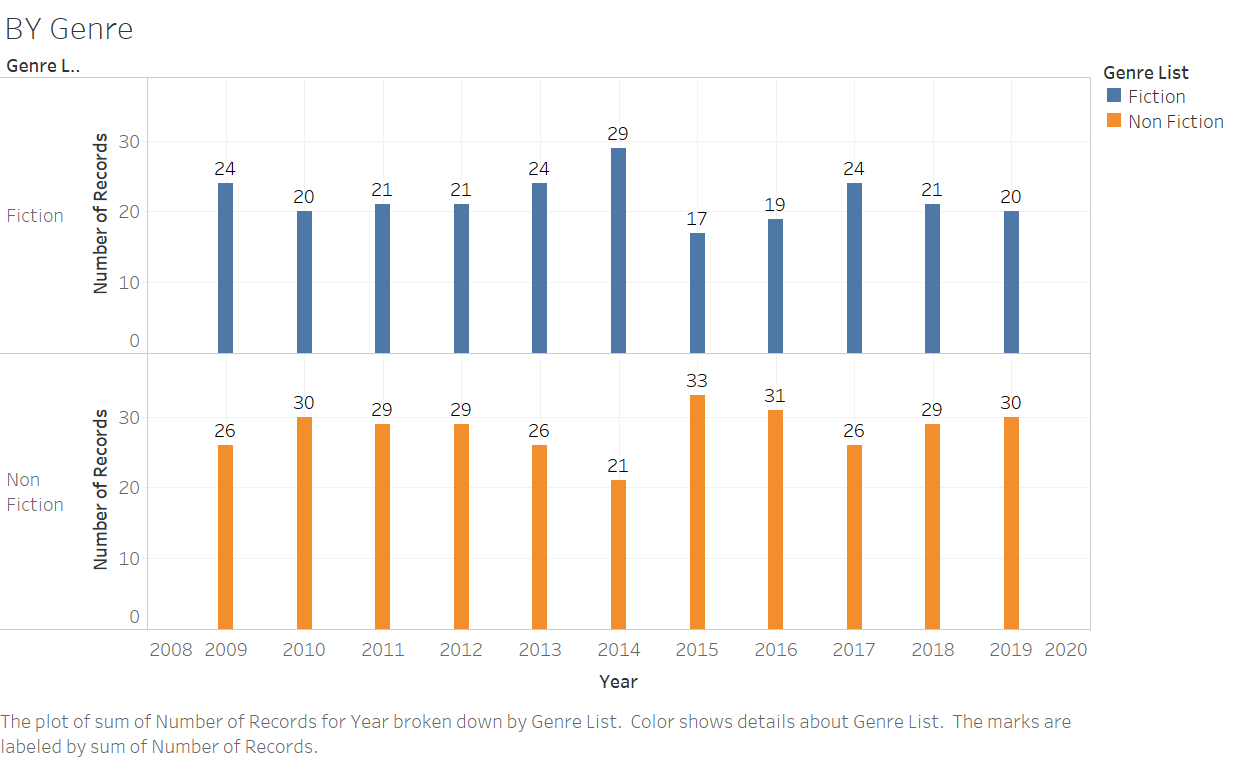

From the figure ,other than 2014, Non-Fiction books were greater than Fiction books among years.

In [6]:
df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [7]:
df['Genre'].astype('category',inplace=True)

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: category
Categories (2, object): [Fiction, Non Fiction]

In [8]:
df[df.duplicated(subset=['Name'])] # check duplicate rows 

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
# since there are too many 4.9 rating in the user ratting with different reviews amount so we have to 
# scale the rating by weight formula 


In [12]:
min_reviews=df['Reviews'].min() # minmum reviews in the column 
min_reviews

37

In [13]:
aver_user_rating=df['User Rating'].mean() # average ratin in the rating column
aver_user_rating

4.618363636363641

In [14]:
def weight_rating(df,min_reviews=min_reviews,aver_user_rating=aver_user_rating):
    book_rating=df['User Rating']
    book_reviews=df['Reviews']
    weight_rating=(book_reviews/(book_reviews+min_reviews))*book_rating + (min_reviews/(min_reviews+book_reviews))*aver_user_rating
    return weight_rating
    

In [17]:
df['Weight Rating']=df.apply(weight_rating,axis=1)
df.sort_values('Weight Rating',ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weight Rating
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction,4.899524
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction,4.899524
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction,4.899524
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction,4.899524
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction,4.899524
...,...,...,...,...,...,...,...,...
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction,3.900784
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction,3.800640
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,3.800640
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction,3.602509


In [20]:
 # since there were some duplcaite rows in the data, we group the dataset
df_group=df.groupby(['Name','Author','Genre'], as_index=False).mean()
df_group.sort_values('Weight Rating', ascending = False)
# the duplicated row reduce to 351 rows from 550 rows

,Name,Author,Genre,User Rating,Reviews,Price,Year,Weight Rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,8.0,2015.5,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,30.0,2016.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,8.0,2013.5,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,5.0,2016.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,5.0,2018.0,4.899275
...,...,...,...,...,...,...,...,...
20,Allegiant,Veronica Roth,Fiction,3.9,6310.0,13.0,2013.0,3.904188
251,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,Fiction,3.9,33844.0,20.0,2013.5,3.900784
88,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,3.8,47265.0,14.0,2012.5,3.800640
101,Go Set a Watchman: A Novel,Harper Lee,Fiction,3.6,14982.0,19.0,2015.0,3.602509


In [21]:
# save group data for tableau visualization
df_group.to_csv(r'C:\Users\fangc\Documents\Projects\Top 50 Beststlling book\df group.csv', index = False, header=True) 

In [98]:
df_group.sort_values(by='Weight Rating',ascending=False).head(10)['Genre']

178        Fiction
116        Fiction
140    Non Fiction
310        Fiction
36         Fiction
69         Fiction
151        Fiction
120        Fiction
349        Fiction
208        Fiction
Name: Genre, dtype: object

In [99]:
# top 10 weight ratings books have 9 out of ten are Fiction books

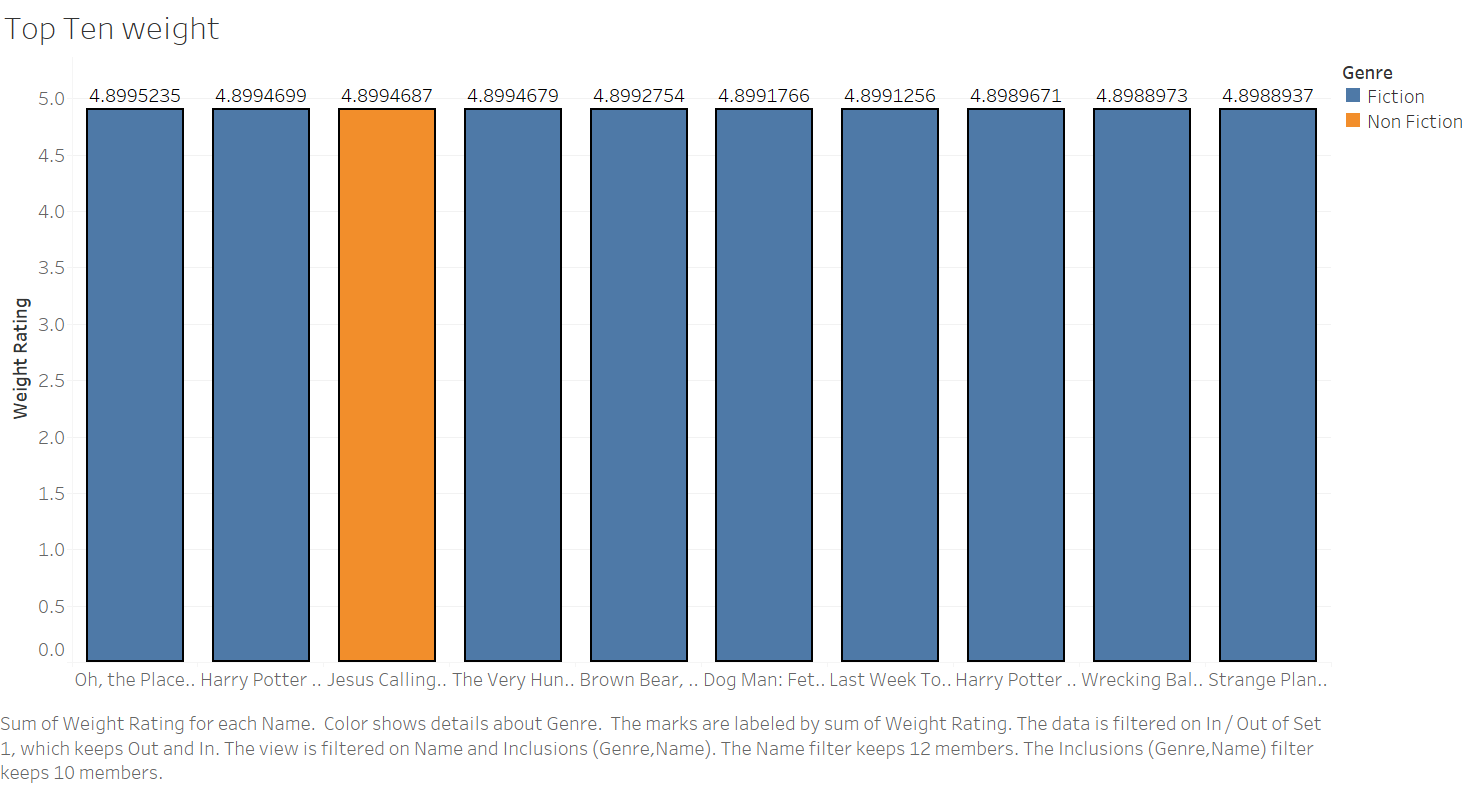

In [140]:
df.groupby(by = 'Genre')['Weight Rating'].mean()

Genre
Fiction        4.648178
Non Fiction    4.595980
Name: Weight Rating, dtype: float64

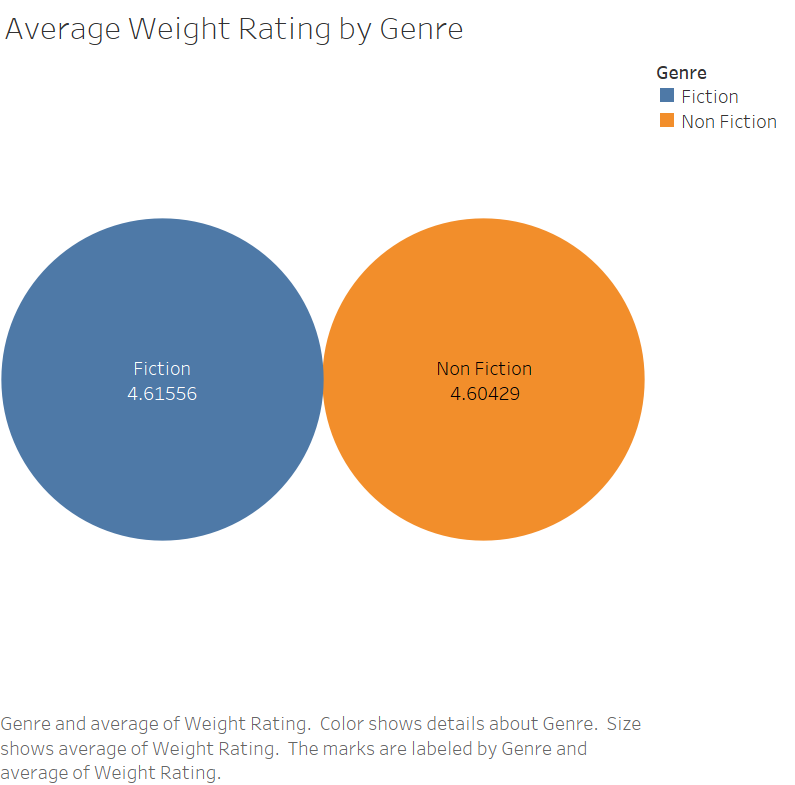

In [102]:
# the average fiction is above the Non fiction

In [109]:
# let take a look the price between fiction and non fiction
df.groupby(by=['Name','Author','Genre'],as_index=False).mean().sort_values(by= 'Price',ascending =False).head(10)

,Name,Author,Genre,User Rating,Reviews,Price,Year,Weight Rating
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,4.5,6679.0,105.0,2013.5,4.500652
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,4.7,3801.0,82.0,2009.0,4.699213
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0,54.0,2016.0,4.898235
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,4.7,858.0,53.0,2009.0,4.696625
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,4.8,13471.0,52.0,2016.0,4.799502
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,4.5,8580.0,46.0,2013.5,4.500508
333,Watchmen,Alan Moore,Fiction,4.8,3829.0,42.0,2009.0,4.798262
281,The Official SAT Study Guide,The College Board,Non Fiction,4.4,1201.0,40.0,2012.0,4.406526
220,The Alchemist,Paulo Coelho,Fiction,4.7,35799.0,39.0,2014.0,4.699916
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,4.3,807.0,36.0,2016.0,4.313957


In [113]:
df.groupby(by='Genre',as_index=False)['Price'].mean() 

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


Price Histogram Price looks rightskewed. It is not a matter of Genre on Price.  
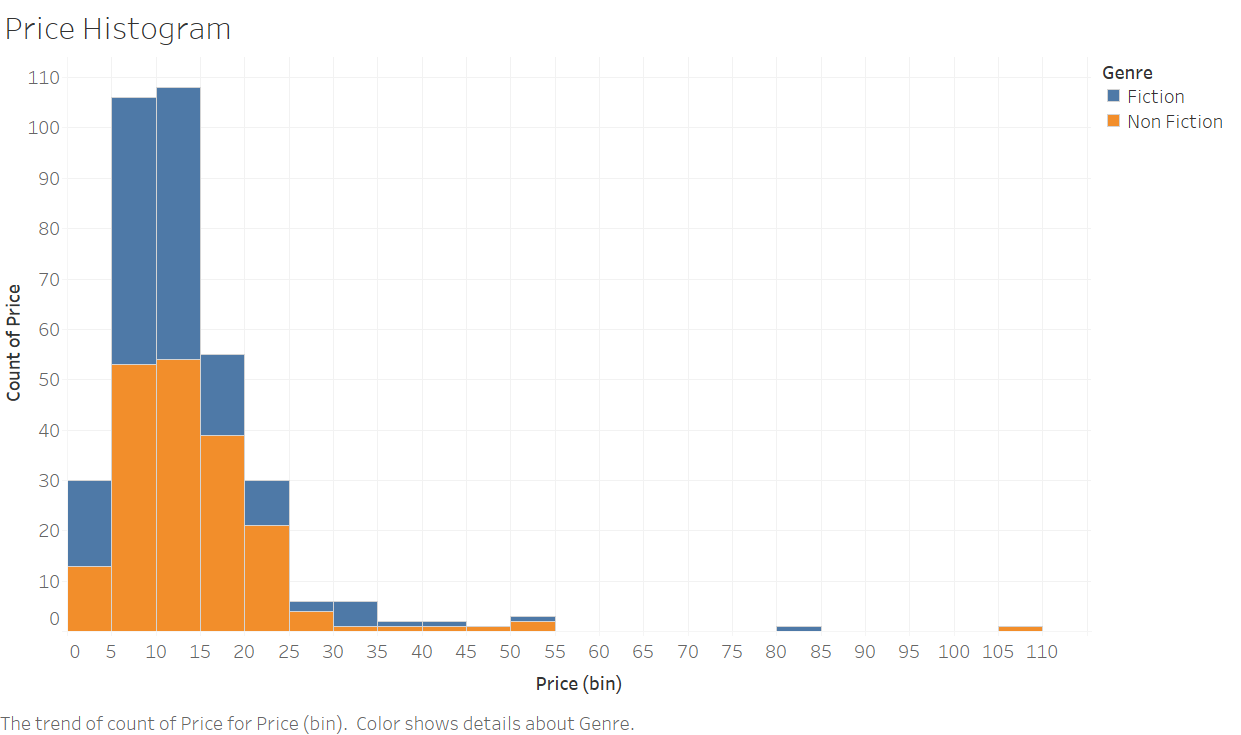


In [115]:
df.groupby(by='Genre',as_index=False)['Reviews'].mean() # Fiction get more reviews than No fiction

,Genre,Reviews
0,Fiction,15683.791667
1,Non Fiction,9065.145161


The histogram is right skewed on reviews counts
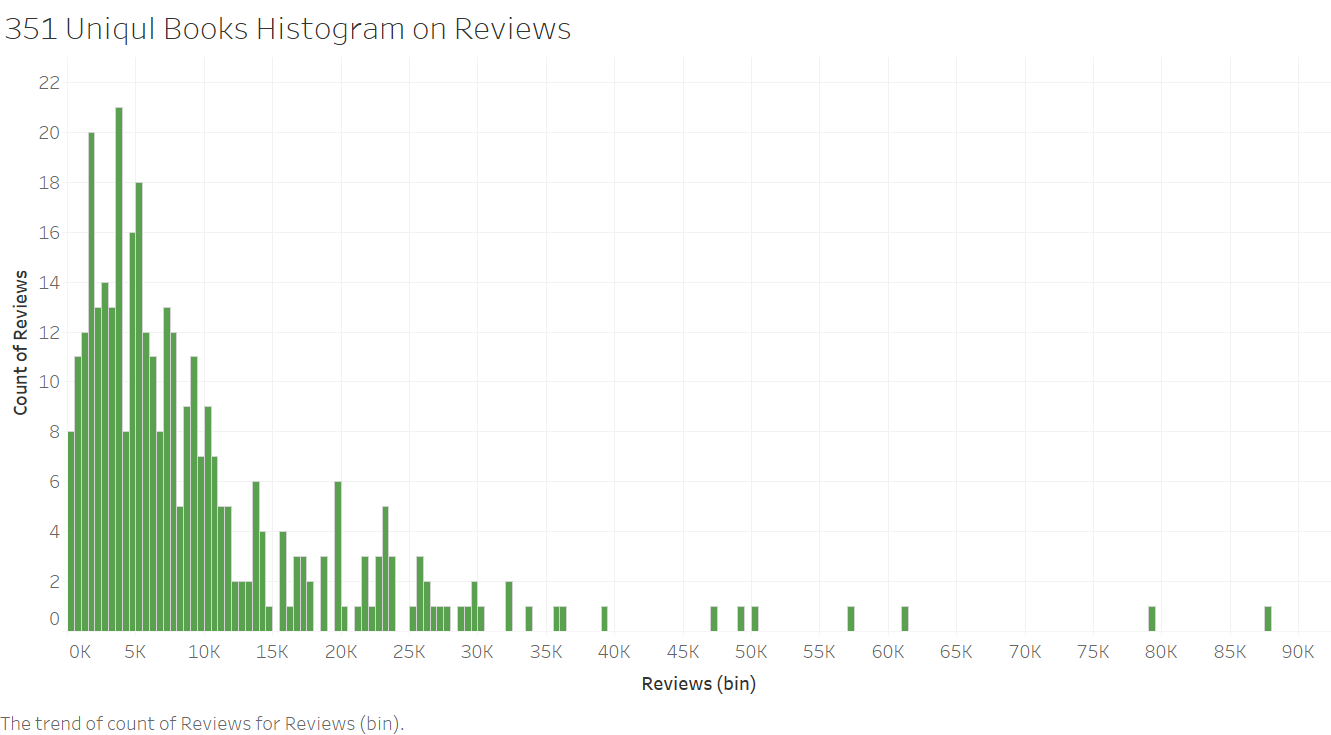

In [22]:
df.groupby(by=['Name','Author','Genre'],as_index=False).mean().nlargest(columns='Reviews',n=10).head(10)['Genre'].value_counts()

Fiction        9
Non Fiction    1
Name: Genre, dtype: int64